In [20]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from scipy.interpolate import interp1d
import numpy as np

In [21]:
#read the data file
df = pd.read_csv("D:/Data Mining/Data Mining/Practical/districtLevelData_discretized.csv")


#extract the class labels and attributes from the data set
y = df.iloc[:,0]
X = df.iloc[:,1:7] #caution: Python excludes right limit
                   #i.e. we are selecting columns 1 to 6 only 
                   
#extract test and train sets (33% adn 67%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

In [22]:
#fit the decision tree in the training set
trainset =[]
testset=[]
for i in range(1,15):
    clf = tree.DecisionTreeClassifier(max_depth=i,criterion='entropy',random_state=0)
    clf.fit(X_train,y_train)  #once we check accuracy in train data set we replace X_train, y_train with X,y to find the original output

    #calculate and print the training accuracy
    y_predicted = clf.predict(X_train)
    confusion_train = pd.crosstab(y_train,y_predicted).to_numpy()
    acc_train = confusion_train.trace()/confusion_train.sum()
    #print(i, 'Training accuracy: ',acc_train)
   
    trainset.append(acc_train)
    #calculate and print the test accuracy
    y_predicted = clf.predict(X_test)
    confusion_test = pd.crosstab(y_test,y_predicted).to_numpy()
    acc_test = confusion_test.trace()/confusion_test.sum()
    #print('Test accuracy: ',acc_test)
   
    testset.append(acc_test)
print(trainset)
print(testset)   
  

[0.84, 0.84, 0.88, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92]
[0.84, 0.84, 0.92, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84, 0.84]


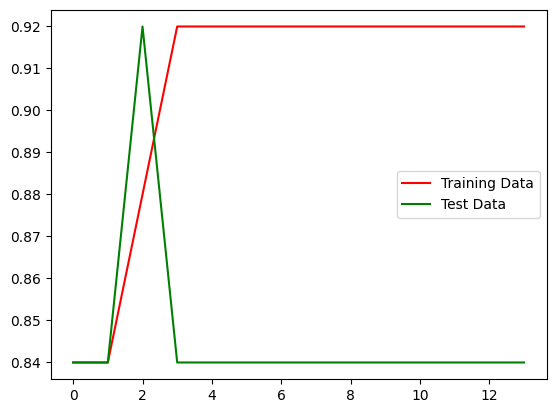

In [23]:
#plotting the lists

plt.plot(trainset, color = 'red' , label="Training Data")
plt.plot(testset, color = 'green' , label="Test Data")
plt.legend()  #without this the label name wouldn't show in the plot
plt.show()


In [24]:
# from scipy.signal import find_peaks
# # Create interpolated functions
# x = np.arange(0, 14)
# f_train = interp1d(x, trainset, kind='linear')
# f_test = interp1d(x, testset, kind='linear')

# # Find all intersection points
# x_intersect = np.linspace(0, 13, 1000)
# y_diff = np.abs(f_train(x_intersect) - f_test(x_intersect))
# minima_indices, _ = find_peaks(-y_diff)

# # Plot all intersection points
# plt.plot(trainset, color='red', label="Training Data")
# plt.plot(testset, color='green', label="Test Data")
# plt.legend()

# for idx in minima_indices:
#     plt.plot(x_intersect[idx], f_train(x_intersect[idx]), 'bo')

# plt.show()

# # Print all intersection points
# intersection_points = [(x_intersect[idx], f_train(x_intersect[idx])) for idx in minima_indices]
# intersection_points
# # Format the intersection points to two decimal places
# formatted_intersection_points = [(f"{x:.2f}", f"{y:.2f}") for x, y in intersection_points]

# # Print the formatted intersection points
# for point in formatted_intersection_points:
#     print(point)

In [33]:
#finding the greatest value of test set accuracy
max_value=0
for i in range(len(testset)):
    if testset[i] >= max_value:
        iteration = i+1
        max_value = testset[i]
print(max_value)
print(iteration)

0.92
3


In [15]:
#fit the decision tree in the training set
trainset =[]
testset=[]

clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0, min_samples_split=5)
clf.fit(X,y)  #once we check accuracy in train data set we replace X_train, y_train with X,y to find the original output

#calculate and print the training accuracy
y_predicted = clf.predict(X_train)
confusion_train = pd.crosstab(y_train,y_predicted).to_numpy()
acc_train = confusion_train.trace()/confusion_train.sum()
print('Training accuracy: ',acc_train)
   

#calculate and print the test accuracy
y_predicted = clf.predict(X_test)
confusion_test = pd.crosstab(y_test,y_predicted).to_numpy()
acc_test = confusion_test.trace()/confusion_test.sum()
print('Test accuracy: ',acc_test)

   


Training accuracy:  0.88
Test accuracy:  0.92


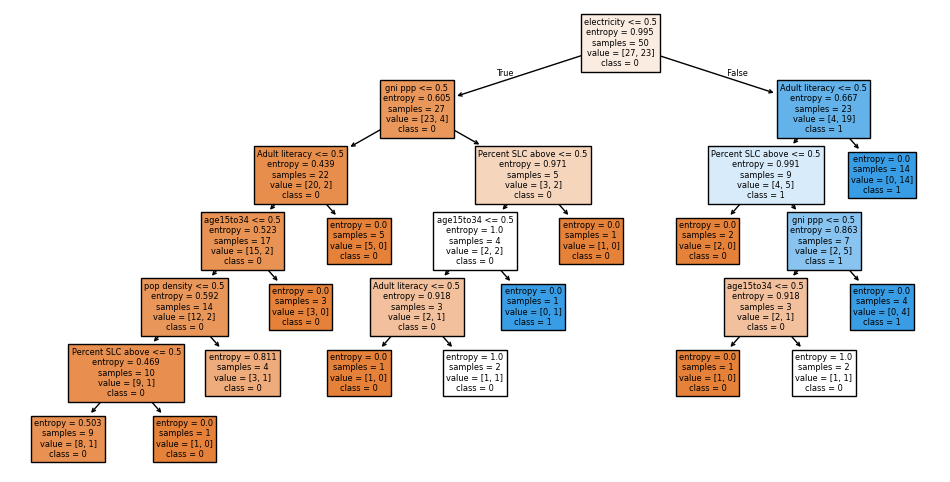

In [34]:
plt.figure(figsize=(12,6))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_.astype(str))
plt.show()

#find the importance of parameter
#learn pdp